# Deep Learning - MCH1
HS22, Manuel Schwarz

# Schritt 1: Auswahl Task / Datensatz
1. Mache Dir Gedanken, mit welchen Daten Du arbeiten möchtest und welcher Task gelernt werden soll.
2. Diskutiere die Idee mit dem Fachcoach.
--> Absprache/Beschluss mit Fachcoach über Daten/Task.

Pytorch stellt einige Datensets zur Verfügung [datasets torch](https://pytorch.org/vision/main/datasets.html).
Verschiedene Kategorien stehen zur Auswahl:
- Image classification
- Image detection or segmentation
- Optical Flow
- Stereo Matching
- Image pairs
- Image captioning
- video classification
- Base classes for custom datasets

### 1. Daten und Task
**Datenset**
Eine beliebtes Dateset ist CIFAR10. Es beinhaltet Bilder von 10 Klassen (Flugzeuge, Katzen, Vögel, etc.), die Bilder kommen mit einer Auflösung von 32x32x3 pixel (rgb). Viele Tutorials starten mit diesem Datenset, das lässt darauf schliessen, dass der Rechenaufwand für die Hardware in einem vernünftigen Rahmen liegt. Daher wird CIFAR10 als Datenset für die Challenge verwendet.

**Task**
Anhand von CIFAR10 soll ein Modell erstellt werden, welches die Klasse eines Bildes klassifizieren kann.

### 2. Besprechung Fachexperten


![](cifar10.png)

# Schritt 2: Daten Kennenlernen
1. Mache Dich mit dem Datensatz vertraut, indem Du eine explorative Analyse der Features durchführst: z.B. Vergleich der Klassen pro Feature, Balanciertheit der Klassen.
2. Führe ein geeignetes Preprocessing durch, z.B. Normalisierung der Daten.

In [137]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

### 1. Explorative Datenanalyse
[Tutorial Dataloader](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)

In [146]:
# Laden der Daten von CIFAR10
data_path = '../11_data/'
train_cifar10_data = torchvision.datasets.CIFAR10(data_path,
                                                  train=True,
                                                  download=True)

test_cifar10_data = torchvision.datasets.CIFAR10(data_path,
                                                  train=False,
                                                  download=True)

Files already downloaded and verified
Files already downloaded and verified


Datengrösse der Trainings- und Testdaten

In [139]:
print(f'Anzahl Trainingsdaten: {len(train_cifar10_data)}\n'
      f'Anzahl Testdaten: {len(test_cifar10_data)}')

Anzahl Trainingsdaten: 50000
Anzahl Testdaten: 10000


**Wie sind die Bilder im Datensatz gespeichert?**
Die Bilder sind direkt auf dem Datenset via dem Index abrufbar. Ein Tupel mit dem Bild (RGB, 32x32 pixel) und dem Label (6).

In [140]:
img_0, label_0 = train_cifar10_data[0]
img_0, label_0

(<PIL.Image.Image image mode=RGB size=32x32>, 6)

In [141]:
# deffinieren der Labels CIFAR10
labels_cifar10 = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck",
}

**Visualisierung der Bilder**
Die Bilder können mit matplotlib und imshow() direkt vom Dateset über den index dargestellt werden.


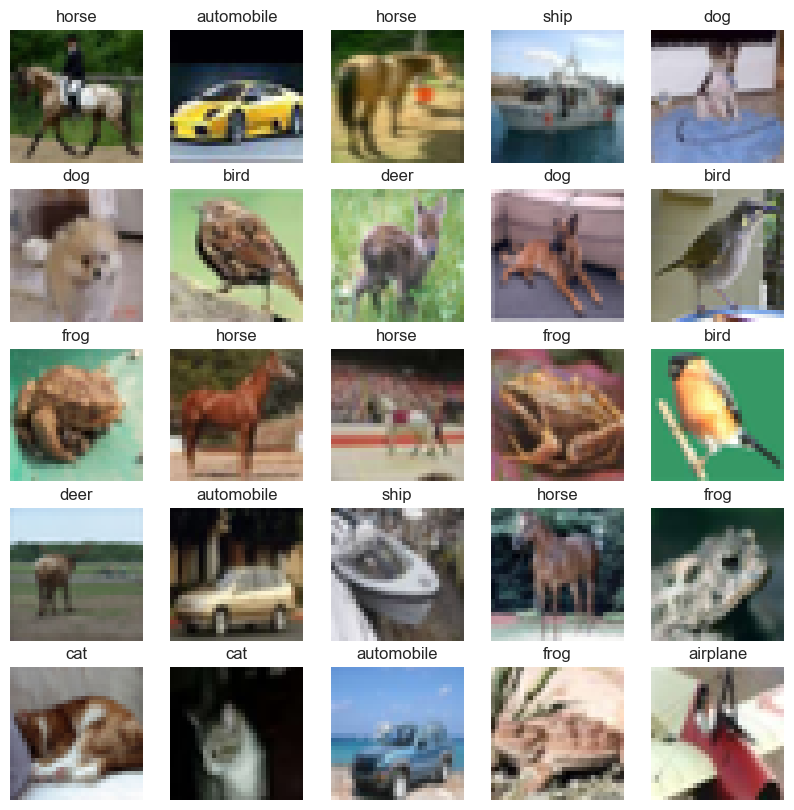

In [142]:
figure = plt.figure(figsize=(10,10))
cols, rows = 5, 5

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_cifar10_data), size=(1,)).item()
    img, label = train_cifar10_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_cifar10[label])
    plt.axis('off')
    plt.imshow(img)
plt.show()

**Untersuchen der Verteilungen der Klassen**
Folgend werden die Verteilungen der Klassen der Cifar10 Datensets auf den Trainings- und Testdaten geprüft. Es ist ersichtlich, dass jede Klassen gleich oft vorkommt. Somit besteht keine Sorge bezüglich einem unbalanciertem Datenset. Es können Metriken wie Accuracy verwendet werden.


In [143]:
train_target = train_cifar10_data.targets
test_target = test_cifar10_data.targets
print(f'Labels in Trainingsdaten: {len(train_target)}')
print(f'Labels in Testdaten: {len(test_target)}')

Labels in Trainingsdaten: 50000
Labels in Testdaten: 10000


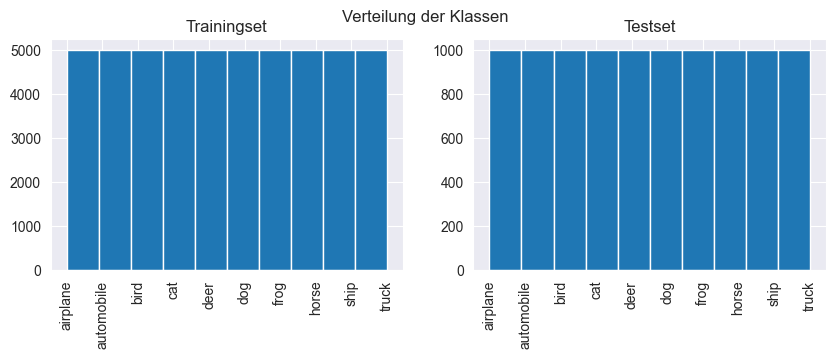

In [144]:
figure, ax = plt.subplots(1,2, figsize=(10, 3))
label_named = list(labels_cifar10.values())

ax[0].hist(train_target)
ax[0].set_xticks(np.arange(10))
ax[0].set_xticklabels(label_named, rotation=90)
ax[0].set_title('Trainingset')

ax[1].hist(test_target)
ax[1].set_xticks(np.arange(10))
ax[1].set_xticklabels(label_named, rotation=90)
ax[1].set_title('Testset')

plt.suptitle('Verteilung der Klassen')
plt.show()

### 2. Preprocessing der Daten

In [145]:
'''
train_data_loader = torch.utils.data.DataLoader(train_cifar10_data,
                                          batch_size=4,
                                          shuffle=True)
'''

'\ntrain_data_loader = torch.utils.data.DataLoader(train_cifar10_data,\n                                          batch_size=4,\n                                          shuffle=True)\n'